<a href="https://colab.research.google.com/github/ribka-5/AI/blob/main/TUBES_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split, train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url='https://drive.google.com/file/d/1X6OHAP8O6FAvL7yxKR6h2mVV-bbIVRtZ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False).head()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
dtype: int64

In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [ ]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
print("Age : ",len(df["Age"].unique()))
print("Sex : ",len(df["Sex"].unique()))
print("BP : ",len(df["BP"].unique()))
print("Cholesterol : ",len(df["Cholesterol"].unique()))
print("Drug : ",len(df["Drug"].unique()))

Age :  57
Sex :  2
BP :  3
Cholesterol :  2
Drug :  5


In [ ]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
def data_encoding(df):
    df.Sex = LabelEncoder().fit_transform(df.Sex)
    df.BP = LabelEncoder().fit_transform(df.BP)
    df.Cholesterol = LabelEncoder().fit_transform(df.Cholesterol)
    # df.Drug = LabelEncoder().fit_transform(df.Drug)

data_encoding(df)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


*   BP: 0=high, 1=low, 2=normal
*   sex:female=0, male=1

*   cholesterol: 0=high,
*   Item daftar






In [ ]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,1.000000,0.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


In [ ]:
# df['Sex'].replace(['F','M'],[0, 1], inplace=True)
# df['BP'].replace(['HIGH', 'NORMAL','LOW'],[0, 1, 2], inplace=True)
# df['Cholesterol'].replace(['HIGH', 'NORMAL'],[0, 1], inplace=True)
# df['Drug'].replace(['drugA','drugB','drugC','drugX','drugY'],[0, 1, 2, 3, 4], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [ ]:
data_encoding(df)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


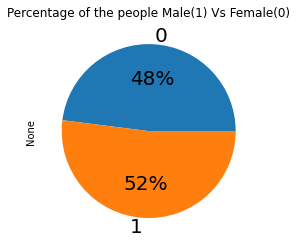

In [ ]:
df.groupby('Sex').size().plot(kind='pie',  textprops={'fontsize': 20},autopct='%1.0f%%')
plt.title('Percentage of the people Male(1) Vs Female(0)')
plt.show()

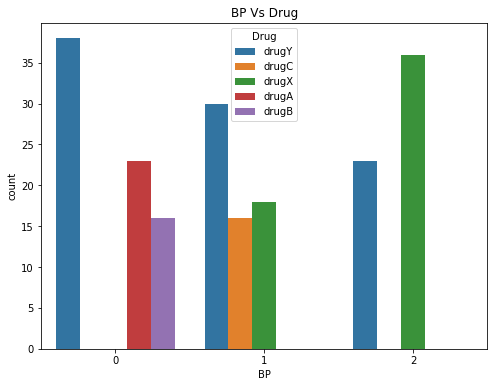

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot('BP', data=df, hue = 'Drug')

plt.title("BP Vs Drug")
plt.show()

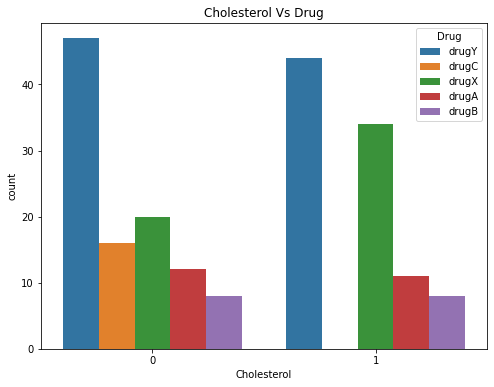

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot('Cholesterol', data=df, hue = 'Drug')

plt.title("Cholesterol Vs Drug")
plt.show()

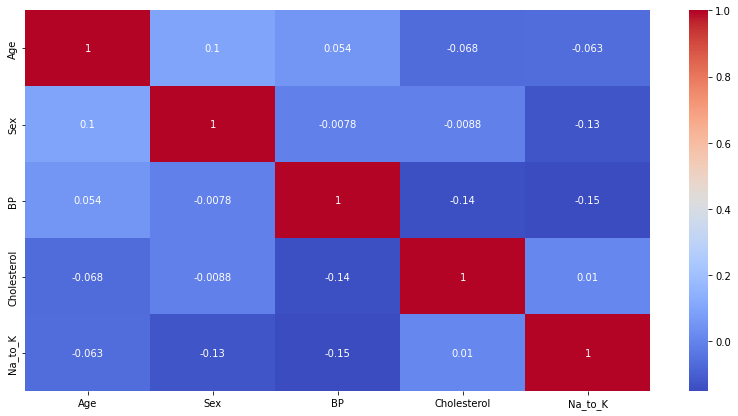

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [ ]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df.Drug.values

# Scaling x
#x = StandardScaler().fit_transform(x)

#print(f'Dataset size: {len(x)}')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

print(f'Training set size: {len(x_train)}')
print(f'Test set size: {len(x_test)}')

Training set size: 140
Test set size: 60


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8166666666666667
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      0.33      0.50        15
       drugX       0.48      1.00      0.65        10
       drugY       1.00      0.96      0.98        23

    accuracy                           0.82        60
   macro avg       0.90      0.86      0.82        60
weighted avg       0.91      0.82      0.81        60

Confusion matrix:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0 10 10  1]
 [ 0  0  0  0 22]]


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9833333333333333
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       0.95      1.00      0.98        20
       drugY       1.00      0.96      0.98        23

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

Confusion matrix:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


In [ ]:
# For cross validation
skf = StratifiedKFold(n_splits=10)

In [ ]:
models = DecisionTreeClassifier()

In [ ]:
scores = cross_val_score(models, x_train, y_train, cv=skf)
print(f'{models}')
print(f'Cross-Validation mean-score: {scores.mean()}')

DecisionTreeClassifier()
Cross-Validation mean-score: 0.9928571428571429


In [ ]:
# Parameter tuning

def dt_param_selection(x, y, nfolds):
    criterion = ['gini', 'entropy']
    splitter = ['best', 'random']
    max_depth = [1, 2, 3, 4, 5]

    param_grid = {
        'criterion': criterion,
        'splitter': splitter,
        'max_depth': max_depth
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=nfolds)
    grid_search.fit(x, y)
    return grid_search.best_params_


best_params_ = dt_param_selection(x_train, y_train, skf)
best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [ ]:
# Cross Validation

model = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best')
scores = cross_val_score(model, x_train, y_train, cv=skf)
print(scores.mean())

0.9928571428571429


In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best')
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_test_pred = model.predict(x_test)

print(f"Prediction: \n{pd.DataFrame(y_test_pred)[0].value_counts()}")

Prediction: 
drugY    23
drugX    20
drugA     7
drugC     5
drugB     5
Name: 0, dtype: int64


In [ ]:
print(f"Actual: \n{pd.DataFrame(y_test).value_counts()}")

Actual: 
drugY    22
drugX    21
drugA     7
drugB     5
drugC     5
dtype: int64


In [ ]:
dtmodel=DecisionTreeClassifier().fit(x_train,y_train)
y_test_pred = dtmodel.predict(x_test)
y_test_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [ ]:
print(f'Model Score: {model.score(x_test, y_test)}')
print(f'f1-score: {f1_score(y_test, y_test_pred, average="weighted")}')
print(f'precision score: {precision_score(y_test, y_test_pred, average="weighted")}')
print(f'recall score: {recall_score(y_test, y_test_pred, average="weighted")}')

Model Score: 0.9833333333333333
f1-score: 0.9833152664859981
precision score: 0.9840579710144927
recall score: 0.9833333333333333


In [ ]:
y_train_pred = model.predict(x_train)

In [ ]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_train_pred))
print("Validation Mean F1 Score: ",cross_val_score(model,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Validation Mean F1 Score:  0.9875555555555555
Validation Mean Accuracy:  0.9928571428571429


In [ ]:
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9833


In [ ]:
accuracy = accuracy_score(y_test,y_test_pred)
report = classification_report(y_test_pred, y_test)
cm = confusion_matrix(y_test, y_test_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9833333333333333
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       0.95      1.00      0.98        20
       drugY       1.00      0.96      0.98        23

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60

Confusion matrix:
[[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]


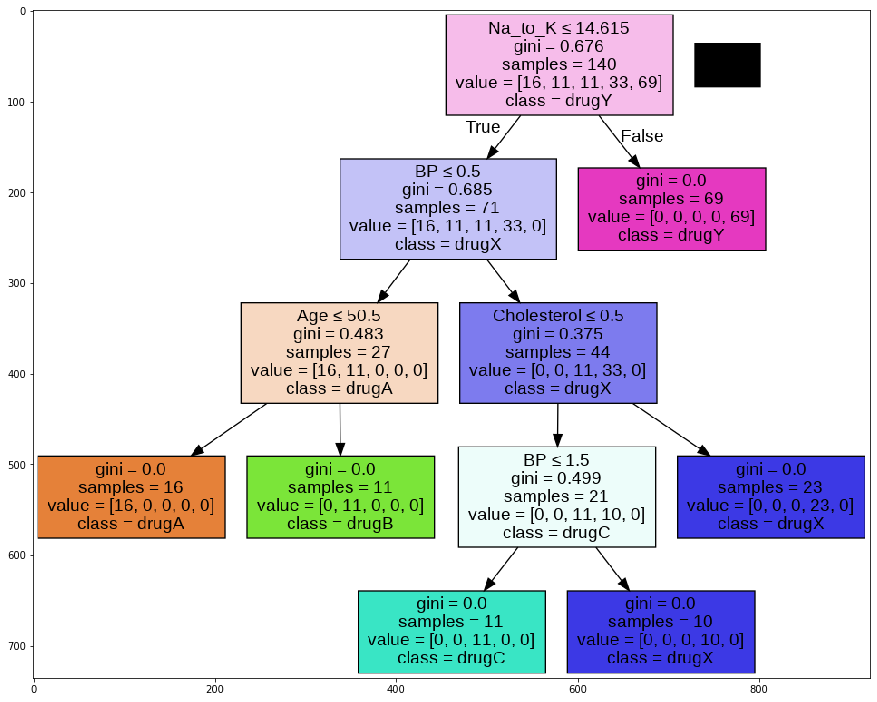

In [ ]:
dot_data = StringIO()

filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()

out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 30))
plt.imshow(img,interpolation='nearest')

[Text(0.625, 0.9, 'X[4] <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.685\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(0.25, 0.5, 'X[0] <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[3] <= 0.5\ngini = 0.375\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(0.625, 0.3, 'X[2] <= 1.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

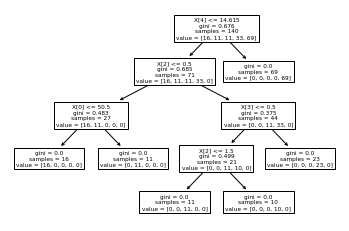

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
tree.plot_tree(model)